## INFS 772 Assignment 4 
### Total 10 points (6 tasks)
<p>Gavin Gunawadena<br>
INFS 772<br>
Professor David Chang</p>

# Image Classification with MNIST Dataset

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist #from Keras download the mnist dataset
from tensorflow.keras.models import Sequential # import the sequential model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense # import the Dense(Fully connected) layer
from tensorflow.keras.layers import Dropout
from keras.optimizers import RMSprop # import rmsprop optimizer
from tensorflow.keras.utils import to_categorical # prepare the labels
import matplotlib.pyplot as plt #import plot as plt
%matplotlib inline
import numpy as np



In [2]:
tf.__version__

'2.3.0'

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

## Task 1: Build Neural Network Using the following code samples (2 points)

```python

model = Sequential() # make our model Sequential

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(50, activation = "relu")) # add a hidden layer
model.add(Dense(10, activation = 'softmax')) # add an output layer

```
### Required Specification for the Hidden Layers

Dense 64 --> Dense 32

Total params: 52,650


In [4]:
# your codes here

# make our model Sequential
model = tf.keras.models.Sequential() # make our model Sequential


# flatten the inputs
model.add(Flatten(input_shape=(28, 28)))
 # add a hidden layer
model.add(Dense(64, activation = "relu")) # add a hidden layer

 # add a hidden layer
model.add(Dense(32, activation = "relu")) # add a hidden layer

 #add Dropout layer
model.add(Dropout(0.2))

 # add an output layer
model.add(Dense(10, activation = 'softmax')) # add an output layer


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


The following cell is not required. Remove it if it doesn't work under your environment

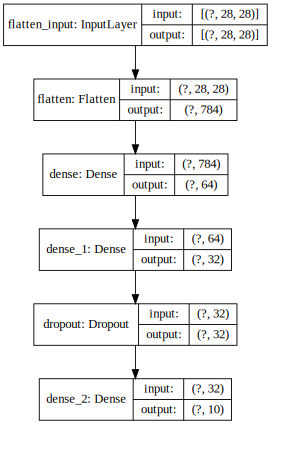

In [6]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

## Task 2: Test the Model Architecture (2 points)

All codes are provided and make sure they produce the expected outputs

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [7]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.10723288, 0.08250955, 0.10201366, 0.06942476, 0.09924974,
        0.10139572, 0.09234369, 0.13016711, 0.12860505, 0.08705786]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.1007095 , 0.09825015, 0.10018524, 0.09697294, 0.09990872,
        0.10012335, 0.09922112, 0.10304588, 0.10288504, 0.09869804]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.3013523

## Task 3: Compile the Model (1 point)

```python

# rmsprop optimizer
model.compile(optimizer = "rmsprop", loss = loss_fn, metrics=['accuracy'])

# Adam optimizer
model.compile(optimizer = "adam", loss = loss_fn, metrics=['accuracy'])
```

### Requirement: compile either rmsprop or adam

In [11]:
# your codes here
model.compile(optimizer = "adam", loss = loss_fn, metrics=['accuracy'])

## Task 4: Fit the Model (1 point)

### Requirement: 10 Epochs and save the outputs into history

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [12]:
# your codes here
history = model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6099 - accuracy: 0.8695
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5351 - accuracy: 0.9309: 0s - los
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5193 - accuracy: 0.9449
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5106 - accuracy: 0.9528
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5051 - accuracy: 0.9579: 0s - loss: 1.5054 - accu
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5008 - accuracy: 0.9616
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4974 - accuracy: 0.9648
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4954 - accuracy: 0.9669
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4932 - accuracy: 0.9686: 0s - loss: 1.4928 
Epoch 10/10
1875/1875 [===

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.4953 - accuracy: 0.9659


[1.495308518409729, 0.9659000039100647]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [14]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
probability_model(x_test[:10])



<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674],
       [0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.08533675, 0.23196934, 0.08533675, 0.08533675, 0.08533675,
        0.08533675, 0.08533675, 0.08533675, 0.08533675, 0.08533675],
       [0.23196934, 0.08533675, 0.08533675, 0.08533675, 0.08533675,
        0.08533675, 0.08533675, 0.08533675, 0.08533675, 0.08533675],
       [0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196931,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.08533675, 0.23196934, 0.08533675, 0.08533675, 0.08533675,
        0.08533675, 0.08533675, 0.08533675, 0.08533675, 0.08533675],
       [0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196931,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08

In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


## Task 5: Visualize training loss and accuracy (1 point)

#### Codes are provided, make sure the outputs are displayed properly.


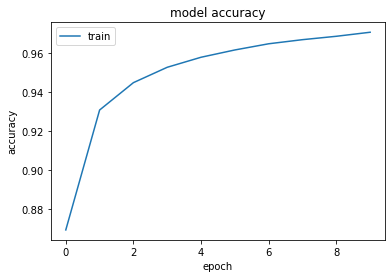

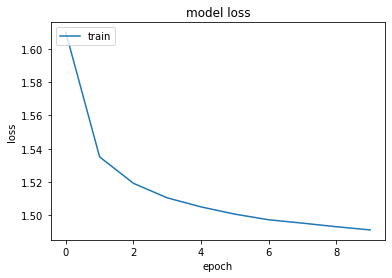

In [16]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Task 6: Build and train a simple CNN model and compare it with the Dense model (3 points)
Which one is better and why (compare the testing accuracy)

### Build, train, and evaluate a simplle CNN model
### Reference: https://keras.io/examples/vision/mnist_convnet/ (2 points)

[Note] The CNN model architecture (and learning process configuration) can be idential to the one in the reference page.

In [17]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [18]:
#Build the model
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [19]:
#Train the model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 34s 80ms/step - loss: 0.3638 - accuracy: 0.8896 - val_loss: 0.0841 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 34s 80ms/step - loss: 0.1091 - accuracy: 0.9663 - val_loss: 0.0572 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 34s 82ms/step - loss: 0.0851 - accuracy: 0.9743 - val_loss: 0.0500 - val_accuracy: 0.9857
Epoch 4/15
422/422 [==============================] - 36s 84ms/step - loss: 0.0713 - accuracy: 0.9779 - val_loss: 0.0422 - val_accuracy: 0.9875
Epoch 5/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0632 - accuracy: 0.9807 - val_loss: 0.0381 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 35s 84ms/step - loss: 0.0574 - accuracy: 0.9827 - val_loss: 0.0359 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 33s 78ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0328 - val_accuracy:

In [20]:
#Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.025648662820458412
Test accuracy: 0.9912999868392944


### Discuss what you learn from comparing the Dense model and the CNN model (1 point)

Your answers here:
The convolutional neural network model had a noticeably higher accuracy and lower loss. The higher accuracy and loss function minimization of the CNN model compared to the Dense model shows how much more effective the CNN model is when working with the MNIST data set. From what I've found via research, this is due to the CNN model working better with image data than the Dense model due to its process of training filters in order to uncover details in the images, making it optimal for feature extraction. The dense model uses layers instead of filters and conducts matrix-vector multiplication on them in order to find details in the image data for feature extraction.